In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

Data Collection

In [3]:
#importing the dataset
df = pd.read_csv("../data/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Preprocessing

Missing Value Analysis

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#replacing the 0 values
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Exploratory Data Analysis

Correlation

<Axes: >

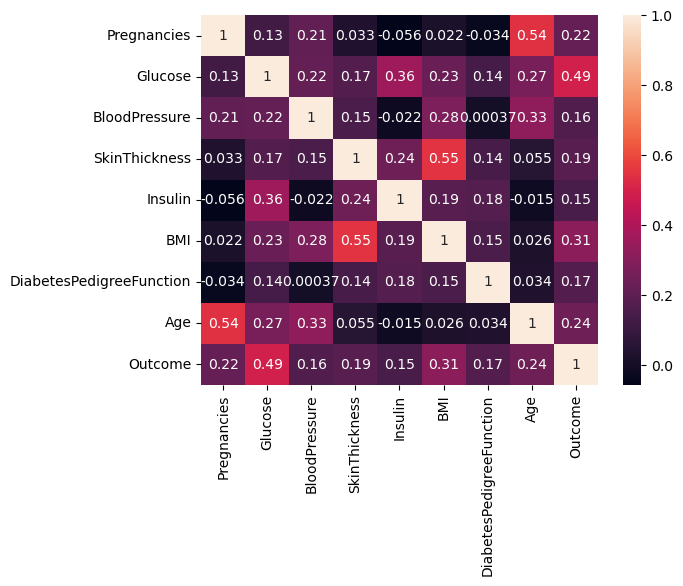

In [8]:
plt.figure()
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Outcome', ylabel='count'>

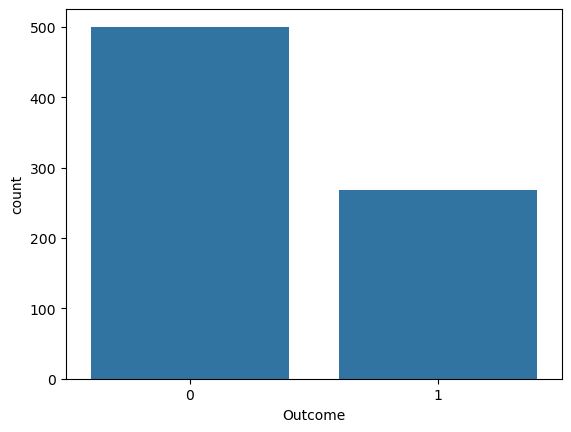

In [9]:
sns.countplot(x='Outcome',data=df)

C:\Users\y2907\AppData\Local\Temp\ipykernel_27512\1559661310.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1],color="Red", shade = True)
C:\Users\y2907\AppData\Local\Temp\ipykernel_27512\1559661310.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], color="Green", shade= True)


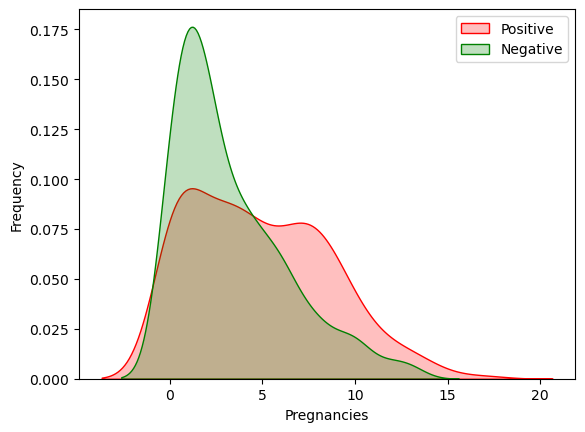

In [10]:
#pregnancies - outcome
plt.figure()
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1],color="Red", shade = True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

C:\Users\y2907\AppData\Local\Temp\ipykernel_27512\1792742917.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="Red", shade = True)
C:\Users\y2907\AppData\Local\Temp\ipykernel_27512\1792742917.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], color="Green", shade= True)


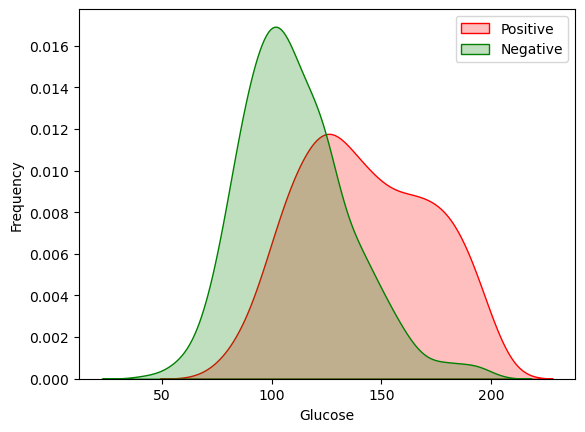

In [11]:
#glucose - outcome
plt.figure()
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], color="Green", shade= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

<Axes: xlabel='Glucose', ylabel='BMI'>

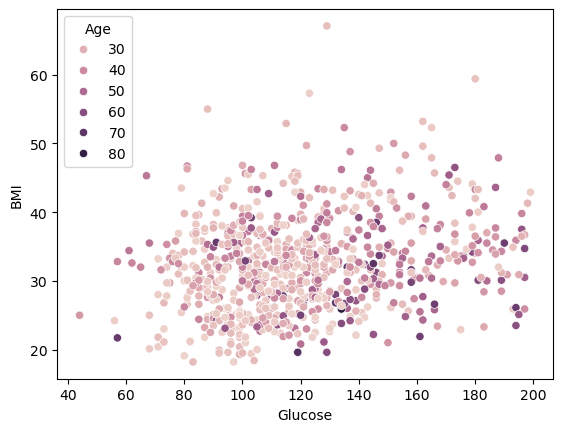

In [12]:
#glucose - bmi - age
plt.figure()
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age")

Feature Selection

Outlier Detection

In [13]:
#outlier detection
def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers

outliers_to_drop = detect_outliers(df, 2 ,["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])

In [14]:
df.drop(df.loc[outliers_to_drop].index, inplace=True)

In [15]:
#data transformation
q  = QuantileTransformer()
X = q.fit_transform(df)
transformedDF = pd.DataFrame(X,columns=df.columns)
transformedDF.head()

c:\Users\y2907\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (765). n_quantiles is set to n_samples.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.746728,0.812173,0.518979,0.804974,0.255890,0.593586,0.752618,0.889398,1.0
1,0.230366,0.091623,0.290576,0.645942,0.255890,0.214005,0.476440,0.556937,0.0
2,0.863220,0.956806,0.234293,0.358639,0.255890,0.077880,0.784031,0.582461,1.0
3,0.230366,0.125654,0.290576,0.358639,0.662958,0.285340,0.106675,0.000000,0.0
4,0.000000,0.723168,0.005236,0.804974,0.834424,0.929319,0.998691,0.604712,1.0


In [16]:
features = df.drop(["Outcome"], axis=1)
labels = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=7)

Model Selection

In [17]:
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]

Model Evaluation

In [18]:
def evaluate_model(models):
    kfold = StratifiedKFold(n_splits = 10)
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"],
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std
    })
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

,Models,CrossValMeans,CrossValerrors
0,LogisticRegression,0.747869,0.069754
1,DecisionTreeClassifier,0.710622,0.083627
2,AdaBoostClassifier,0.703110,0.071917
3,SVC,0.760901,0.050156
4,RandomForestClassifier,0.762893,0.061561
5,GradientBoostingClassifier,0.749860,0.098352
6,KNeighborsClassifier,0.720021,0.090282


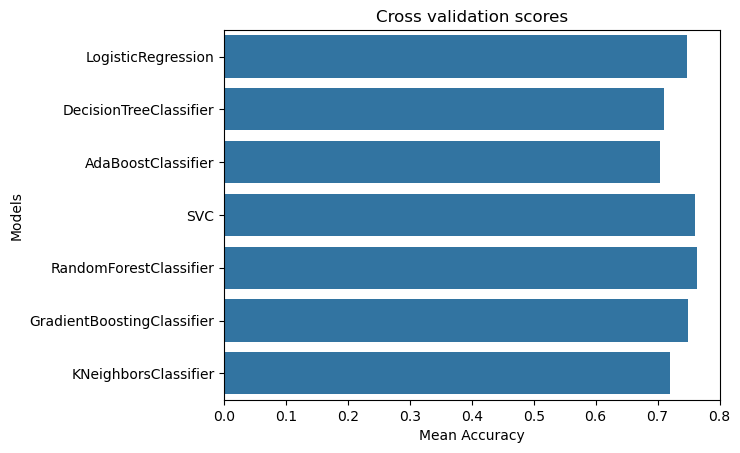

In [19]:
evaluate_model(models)

Hyper paramater tuning

In [20]:
def analyze_grid_result(grid_result):
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

In [21]:
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(x_train, y_train)

analyze_grid_result(logi_result)

Tuned hyperparameters: (best parameters)  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.7883636363636363
0.788 (+/-0.260) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.788 (+/-0.260) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.788 (+/-0.260) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.788 (+/-0.250) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.785 (+/-0.253) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.745 (+/-0.266) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.773 (+/-0.238) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.705 (+/-0.281) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.773 (+/-0.232) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.696 (+/-0.264) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}



In [22]:
print("Classification Report\n")
y_pred = logi_result.predict(x_test)
print(classification_report(y_test, y_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       147
           1       0.68      0.58      0.62        83

    accuracy                           0.75       230
   macro avg       0.73      0.71      0.72       230
weighted avg       0.74      0.75      0.74       230



In [23]:
x_test['pred'] = y_pred
print(x_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
236            7    181.0           84.0             21    192.0  35.9   
715            7    187.0           50.0             33    392.0  33.9   
766            1    126.0           60.0             23     30.5  30.1   
499            6    154.0           74.0             32    193.0  29.3   
61             8    133.0           72.0             23     30.5  32.9   
..           ...      ...            ...            ...      ...   ...   
189            5    139.0           80.0             35    160.0  31.6   
351            4    137.0           84.0             23     30.5  31.2   
120            0    162.0           76.0             56    100.0  53.2   
108            3     83.0           58.0             31     18.0  34.3   
637            2     94.0           76.0             18     66.0  31.6   

     DiabetesPedigreeFunction  Age  pred  
236                     0.586   51     1  
715                     0